In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df = pd.read_csv('../Karminagar.csv')
print(df.shape)
df

(84, 4)


,Date,PM10,NOx,SO2
0,01-01-2016,69,22.0,8.0
1,01-02-2016,59,25.0,9.0
2,01-03-2016,42,32.1,7.7
3,01-04-2016,62,29.0,7.0
4,01-05-2016,52,21.0,5.0
...,...,...,...,...
79,01-08-2022,55,27.4,6.0
80,01-09-2022,58,29.9,6.7
81,01-10-2022,62,30.6,6.7
82,01-11-2022,103,26.1,6.2


In [ ]:
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15))

69   2021-01-10
70   2021-01-11
71   2021-01-12
72   2022-01-01
73   2022-01-02
74   2022-01-03
75   2022-01-04
76   2022-01-05
77   2022-01-06
78   2022-01-07
79   2022-01-08
80   2022-01-09
81   2022-01-10
82   2022-01-11
83   2022-01-12
Name: Date, dtype: datetime64[ns]


In [ ]:
cols = list(df)[1:4]
print(cols)

['PM10', 'NOx', 'SO2']


<AxesSubplot:>

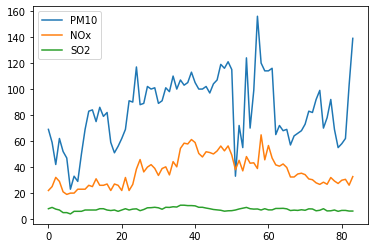

In [ ]:
df_for_training = df[cols].astype(float)
df_for_training.plot()

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training

,PM10,NOx,SO2
0,69.0,22.0,8.0
1,59.0,25.0,9.0
2,42.0,32.1,7.7
3,62.0,29.0,7.0
4,52.0,21.0,5.0
...,...,...,...
79,55.0,27.4,6.0
80,58.0,29.9,6.7
81,62.0,30.6,6.7
82,103.0,26.1,6.2


In [ ]:
n_future = 12
n_past = 3

In [ ]:
trainX = []
trainYP = []
trainYN = []
trainYS = []

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainYP.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    trainYN.append(df_for_training_scaled[i + n_future - 1:i + n_future, 1])
    trainYS.append(df_for_training_scaled[i + n_future - 1:i + n_future, 2])

In [ ]:
trainX, trainYP, trainYN, trainYS = np.array(trainX), np.array(trainYP), np.array(trainYN), np.array(trainYS)
print('trainX shape == {}.'.format(trainX.shape))
print('trainYP shape == {}.'.format(trainYP.shape))
print('trainYN shape == {}.'.format(trainYN.shape))
print('trainYS shape == {}.'.format(trainYS.shape))

trainX shape == (70, 3, 3).
trainYP shape == (70, 1).
trainYN shape == (70, 1).
trainYS shape == (70, 1).


In [ ]:
modelP = Sequential()
modelP.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelP.add(LSTM(32, activation='relu', return_sequences=False))
modelP.add(Dropout(0.2))
modelP.add(Dense(trainYP.shape[1]))

In [ ]:
modelP.compile(optimizer='adam', loss='mse')
modelP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = modelP.fit(trainX, trainYP, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/200
4/4 [==============================] - 7s 143ms/step - loss: 0.8128 - val_loss: 1.2178
Epoch 2/200
4/4 [==============================] - 0s 23ms/step - loss: 0.7962 - val_loss: 1.2159
Epoch 3/200
4/4 [==============================] - 0s 28ms/step - loss: 0.7840 - val_loss: 1.2142
Epoch 4/200
4/4 [==============================] - 0s 35ms/step - loss: 0.7768 - val_loss: 1.2133
Epoch 5/200
4/4 [==============================] - 0s 29ms/step - loss: 0.7710 - val_loss: 1.2121
Epoch 6/200
4/4 [==============================] - 0s 23ms/step - loss: 0.7760 - val_loss: 1.2102
Epoch 7/200
4/4 [==============================] - 0s 29ms/step - loss: 0.7535 - val_loss: 1.2083
Epoch 8/200
4/4 [==============================] - 0s 22ms/step - loss: 0.7267 - val_loss: 1.2054
Epoch 9/200
4/4 [==============================] - 0s 27ms/step - loss: 0.7379 - val_loss: 1.2032
Epoch 10/200
4/4 [==============================] - 0s 21ms/step - loss: 0.7260 - val_loss: 1.1981
Epoch 11/200
4/4 [

In [ ]:
historyP = history

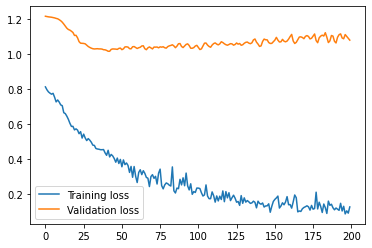

In [ ]:
plt.plot(historyP.history['loss'], label='Training loss')
plt.plot(historyP.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predict_period_dates = pd.date_range(start = '01-01-2023',periods=12, freq='M').tolist()
print(predict_period_dates)

[Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M'), Timestamp('2023-12-31 00:00:00', freq='M')]


In [ ]:
predictionP = modelP.predict(trainX[:12])

1/1 [==============================] - 0s 277ms/step


In [ ]:
prediction_copiesP = np.repeat(predictionP, df_for_training.shape[1], axis=-1)
y_pred_futureP = scaler.inverse_transform(prediction_copiesP)[:,0]

In [ ]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [ ]:
df_forecastP = pd.DataFrame({'Date':np.array(forecast_dates), 'PM10':y_pred_futureP})
df_forecastP['Date']=pd.to_datetime(df_forecastP['Date'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='PM10'>

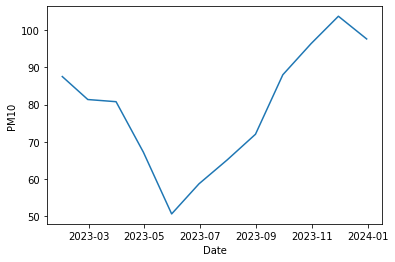

In [ ]:
sns.lineplot(df_forecastP['Date'], df_forecastP['PM10'])

In [ ]:
df_forecastP

,Date,PM10
0,2023-01-31,87.539909
1,2023-02-28,81.372368
2,2023-03-31,80.789467
3,2023-04-30,67.225899
4,2023-05-31,50.658237
5,2023-06-30,58.736134
6,2023-07-31,65.171097
7,2023-08-31,72.050346
8,2023-09-30,88.017815
9,2023-10-31,96.375610


In [ ]:
modelN = Sequential()
modelN.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelN.add(LSTM(32, activation='relu', return_sequences=False))
modelN.add(Dropout(0.2))
modelN.add(Dense(trainYN.shape[1]))

In [ ]:
modelN.compile(optimizer='adam', loss='mse')
modelN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyN = modelN.fit(trainX, trainYN, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/200
4/4 [==============================] - 4s 129ms/step - loss: 0.9876 - val_loss: 0.4372
Epoch 2/200
4/4 [==============================] - 0s 24ms/step - loss: 0.9599 - val_loss: 0.4436
Epoch 3/200
4/4 [==============================] - 0s 23ms/step - loss: 0.9422 - val_loss: 0.4505
Epoch 4/200
4/4 [==============================] - 0s 27ms/step - loss: 0.9159 - val_loss: 0.4581
Epoch 5/200
4/4 [==============================] - 0s 28ms/step - loss: 0.8977 - val_loss: 0.4657
Epoch 6/200
4/4 [==============================] - 0s 31ms/step - loss: 0.8670 - val_loss: 0.4744
Epoch 7/200
4/4 [==============================] - 0s 28ms/step - loss: 0.8408 - val_loss: 0.4819
Epoch 8/200
4/4 [==============================] - 0s 29ms/step - loss: 0.8015 - val_loss: 0.4881
Epoch 9/200
4/4 [==============================] - 0s 25ms/step - loss: 0.7707 - val_loss: 0.4936
Epoch 10/200
4/4 [==============================] - 0s 33ms/step - loss: 0.7711 - val_loss: 0.4923
Epoch 11/200
4/4 [

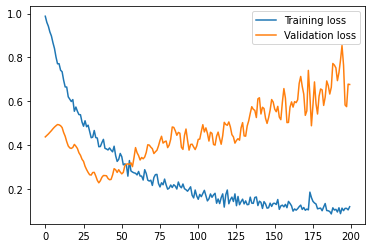

In [ ]:
plt.plot(historyN.history['loss'], label='Training loss')
plt.plot(historyN.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionN = modelN.predict(trainX[:12])

1/1 [==============================] - 0s 263ms/step


In [ ]:
prediction_copiesN = np.repeat(predictionN, df_for_training.shape[1], axis=-1)
y_pred_futureN = scaler.inverse_transform(prediction_copiesN)[:,1]

In [ ]:
df_forecastN = pd.DataFrame({'Date':np.array(forecast_dates), 'NOx':y_pred_futureN})
df_forecastN['Date']=pd.to_datetime(df_forecastN['Date'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='NOx'>

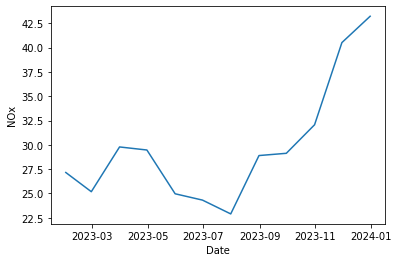

In [ ]:
sns.lineplot(df_forecastN['Date'], df_forecastN['NOx'])

In [ ]:
df_forecastN

,Date,NOx
0,2023-01-31,27.158888
1,2023-02-28,25.184647
2,2023-03-31,29.783689
3,2023-04-30,29.469425
4,2023-05-31,24.970583
5,2023-06-30,24.321030
6,2023-07-31,22.901304
7,2023-08-31,28.899277
8,2023-09-30,29.130520
9,2023-10-31,32.064262


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYS.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/200
4/4 [==============================] - 4s 137ms/step - loss: 0.8873 - val_loss: 0.7938
Epoch 2/200
4/4 [==============================] - 0s 28ms/step - loss: 0.8738 - val_loss: 0.8146
Epoch 3/200
4/4 [==============================] - 0s 23ms/step - loss: 0.8654 - val_loss: 0.8320
Epoch 4/200
4/4 [==============================] - 0s 36ms/step - loss: 0.8573 - val_loss: 0.8502
Epoch 5/200
4/4 [==============================] - 0s 29ms/step - loss: 0.8461 - val_loss: 0.8674
Epoch 6/200
4/4 [==============================] - 0s 27ms/step - loss: 0.8382 - val_loss: 0.8836
Epoch 7/200
4/4 [==============================] - 0s 23ms/step - loss: 0.8272 - val_loss: 0.9035
Epoch 8/200
4/4 [==============================] - 0s 28ms/step - loss: 0.8250 - val_loss: 0.9131
Epoch 9/200
4/4 [==============================] - 0s 24ms/step - loss: 0.8066 - val_loss: 0.9219
Epoch 10/200
4/4 [==============================] - 0s 23ms/step - loss: 0.7938 - val_loss: 0.9380
Epoch 11/200
4/4 [

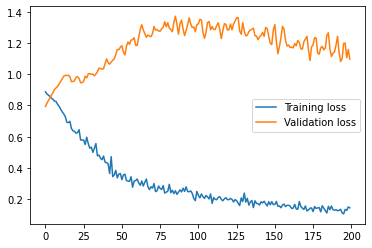

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX[:12])

1/1 [==============================] - 0s 262ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
df_forecastS = pd.DataFrame({'Date':np.array(forecast_dates), 'SO2':y_pred_futureS})
df_forecastS['Date']=pd.to_datetime(df_forecastS['Date'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='SO2'>

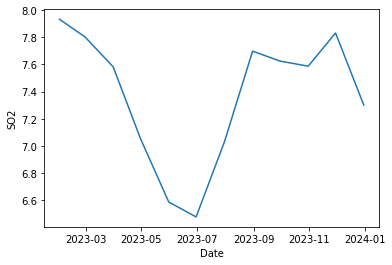

In [ ]:
sns.lineplot(df_forecastS['Date'], df_forecastS['SO2'])

In [ ]:
df_forecastS

,Date,SO2
0,2023-01-31,7.933721
1,2023-02-28,7.803687
2,2023-03-31,7.582242
3,2023-04-30,7.051498
4,2023-05-31,6.584076
5,2023-06-30,6.474168
6,2023-07-31,7.026757
7,2023-08-31,7.698150
8,2023-09-30,7.624876
9,2023-10-31,7.587214


In [ ]:
frames = [df_forecastP, df_forecastN[['NOx']], df_forecastS[['SO2']]]

In [ ]:
result = pd.concat([df_forecastP, df_forecastN[['NOx']], df_forecastS[['SO2']]], axis=1)

In [ ]:
result

,Date,PM10,NOx,SO2
0,2023-01-31,87.539909,27.158888,7.933721
1,2023-02-28,81.372368,25.184647,7.803687
2,2023-03-31,80.789467,29.783689,7.582242
3,2023-04-30,67.225899,29.469425,7.051498
4,2023-05-31,50.658237,24.970583,6.584076
5,2023-06-30,58.736134,24.321030,6.474168
6,2023-07-31,65.171097,22.901304,7.026757
7,2023-08-31,72.050346,28.899277,7.698150
8,2023-09-30,88.017815,29.130520,7.624876
9,2023-10-31,96.375610,32.064262,7.587214


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/LSTM Karimnagar AQI.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  result.to_csv(f)

Mounted at /content/drive
